In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
saks = pd.read_csv('saks_processed.csv')

In [3]:
saks.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category department  original_price  discount_price  order  \
0  dress-shirts        men           250.0           175.0      1   
1  dress-shirts        men           295.0           206.5      2   
2  dress-shirts        men           250.0           175.0      5   
3  dress-shirts        men           295.0           206.5      6   
4  dress-shirts        men           225.0           157.5      7   

   percent_off private_label  brand_mean brand_positioning  
0         30.0   Non-Private  260.457143      Contemporary  
1         30.0   Non-Private  260.457143      Contemporary  
2         30.0   Non-Private  260.457143      Contemporary  
3         30.0   Non-Private  260.457143      Contemporary  
4         30.0   Non-Private  260.457143      Contemporary

In [4]:
off5th = pd.read_csv('off5th_processed.csv')

In [5]:
off5th = off5th[['website','brand_name','product_name','category','department',
        'original_price','discount_price','order','percent_off',
        'private_label','brand_mean','brand_positioning']]

In [6]:
combined = saks.append(off5th)

In [7]:
combined.groupby('website').mean()

original_price  discount_price        order  percent_off  brand_mean
website                                                                      
Off5th       530.460340      171.714081  1536.564273    62.611917  571.400213
Saks         815.819128      343.363021  1322.842818    55.881662  815.819128

In [8]:
combined.sample(10)

website                 brand_name                       product_name  \
1144    Saks        Derek Lam 10 Crosby        Talia Floral Babydoll Dress   
3699    Saks             Emporio Armani     Micro-Check Cotton Dress Shirt   
4798  Off5th               Calvin Klein            Colorblock Sheath Dress   
3543    Saks                     Galvan  Moonlight Sequined Cocktail Dress   
626     Saks                 Trina Turk          Arlisa Pintuck Shirtdress   
1239  Off5th             Alice + Olivia         Harmie Metallic Slip Dress   
4387  Off5th  Nanette By Nanette Lepore        Pintucked Floral Shirtdress   
2487  Off5th            Roberto Cavalli         Stretch Cotton Dress Shirt   
1472  Off5th    Michael Kors Collection        Dance-Print Silk Shirtdress   
3686    Saks          Polo Ralph Lauren             Logo-Embroidered Shirt   

                       category       department  original_price  \
1144                    dresses  women-s-apparel          495.00   
3699               dress-shirts              men          225.00   
4798                    dresses            women           89.98   
3543                    dresses  women-s-apparel         2600.00   
626                     dresses  women-s-apparel          348.00   
1239                    dresses            women          275.00   
4387                    dresses            women          128.00   
2487               dress-shirts              men          350.00   
1472                    dresses            women         2690.00   
3686  casual-button-down-shirts              men           98.50   

      discount_price  order  percent_off private_label   brand_mean  \
1144          198.00    576        60.00   Non-Private   480.000000   
3699          112.50    156        50.00   Non-Private   301.388889   
4798           49.99   2783        44.44   Non-Private   193.047017   
3543         1040.00   2836        60.00   Non-Private  2036.666667   
626           139.20    590        60.00   Non-Private   322.444444   
1239           76.99   1961        72.00   Non-Private   505.723684   
4387           44.99   1495        64.85   Non-Private   134.200000   
2487           59.99    121        82.86   Non-Private  3685.000000   
1472          899.99   2353        66.54   Non-Private  2152.400000   
3686           68.95    235        30.00   Non-Private   173.755319   

     brand_positioning  
1144      Contemporary  
3699            Trendy  
4798            Trendy  
3543            Luxury  
626       Contemporary  
1239      Contemporary  
4387            Trendy  
2487            Luxury  
1472            Luxury  
3686            Trendy

In [9]:
combined_melt = pd.melt(combined,id_vars=['website','brand_name','product_name','category','brand_positioning','private_label'],
                        value_vars=['original_price','discount_price','percent_off'])

In [10]:
combined_melt.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category brand_positioning private_label        variable  value  
0  dress-shirts      Contemporary   Non-Private  original_price  250.0  
1  dress-shirts      Contemporary   Non-Private  original_price  295.0  
2  dress-shirts      Contemporary   Non-Private  original_price  250.0  
3  dress-shirts      Contemporary   Non-Private  original_price  295.0  
4  dress-shirts      Contemporary   Non-Private  original_price  225.0

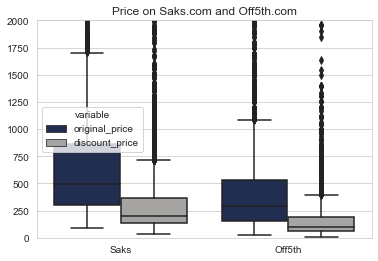

In [11]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=combined_melt.loc[combined_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 2000))
ax.set(ylabel='',xlabel='',title = 'Price on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("price_by_site.png")
fig.savefig("price_by_site.pdf")

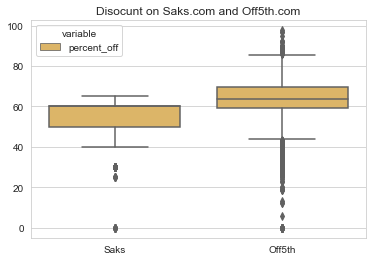

In [12]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=combined_melt.loc[combined_melt['variable']=='percent_off'], 
                 palette=['#f0bc54'])
# ax.set(ylim=(0, 2000))
ax.set(ylabel='',xlabel='',title = 'Disocunt on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("discount_by_site.png")
fig.savefig("discount_by_site.pdf")

In [13]:
import plotly.figure_factory as ff

saks_ = combined.loc[combined['website']=='Saks']['discount_price']
off5th_ = combined.loc[combined['website']=='Off5th']['discount_price']

hist_data = [saks_, off5th_]
group_labels = ['Saks', 'Off5th']
colors = ['rgb(25, 43, 87)','rgb(166, 164, 161)'] #'rgb(240, 188, 84)',

fig = ff.create_distplot(hist_data, group_labels, bin_size=30, colors= colors)
fig.update_layout(title_text='Discount Price Distribution On Saks.com and Off5th.com',
                  plot_bgcolor='rgb(256, 256, 256)',
                  xaxis=dict(range=[0,2400])) #end at 3500-ish
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [14]:
import plotly.figure_factory as ff

saks_ = combined.loc[combined['website']=='Saks']['original_price']
off5th_ = combined.loc[combined['website']=='Off5th']['original_price']

hist_data = [saks_, off5th_]
group_labels = ['Saks', 'Off5th']
colors = ['rgb(25, 43, 87)','rgb(166, 164, 161)'] #'rgb(240, 188, 84)',

fig = ff.create_distplot(hist_data, group_labels, bin_size=75, colors= colors)
fig.update_layout(title_text='Original Price Distribution On Saks.com and Off5th.com',
                  plot_bgcolor='rgb(256, 256, 256)',
                  xaxis=dict(range=[0,6000])) #end at 10000-ish)
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [19]:
price_only = combined_melt.loc[combined_melt['variable']!='percent_off']
bins = [0,25,50,75,100,150,200,350,550,750,1000,1300,1750,2250,2700,3200,4000,10000]


In [20]:
price_only['backet'] = pd.cut(price_only['value'],bins)
basket = price_only.groupby(['variable','backet']).count()[['value']].reset_index()
basket.head()

variable      backet   value
0  discount_price     (0, 25]    77.0
1  discount_price    (25, 50]   914.0
2  discount_price    (50, 75]  1221.0
3  discount_price   (75, 100]   901.0
4  discount_price  (100, 150]  1481.0

In [21]:
original = price_only[price_only['variable']=='original_price']
discount = price_only[price_only['variable']=='discount_price']
original.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category brand_positioning private_label        variable  value  \
0  dress-shirts      Contemporary   Non-Private  original_price  250.0   
1  dress-shirts      Contemporary   Non-Private  original_price  295.0   
2  dress-shirts      Contemporary   Non-Private  original_price  250.0   
3  dress-shirts      Contemporary   Non-Private  original_price  295.0   
4  dress-shirts      Contemporary   Non-Private  original_price  225.0   

       backet  
0  (200, 350]  
1  (200, 350]  
2  (200, 350]  
3  (200, 350]  
4  (200, 350]

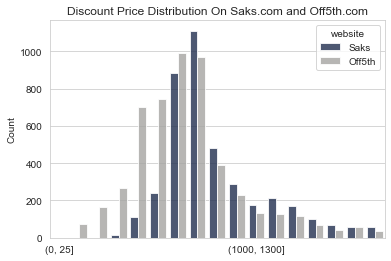

In [22]:
import seaborn as sns
ax = sns.countplot(x="backet",hue="website", data=original, dodge=True, 
                   palette=['#192b57','#a6a4a1'], alpha=0.8)
ax.set(ylabel='Count',xlabel='',title = 'Discount Price Distribution On Saks.com and Off5th.com')
# ax.set_width(0.2)
# ax.set_xticks([0,500,1000,1500,2000,2500])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig = ax.get_figure()
fig.savefig("basket.pdf")

Text(0.5, 1.0, 'Scatter Plot of Original Price and Percentage Off')

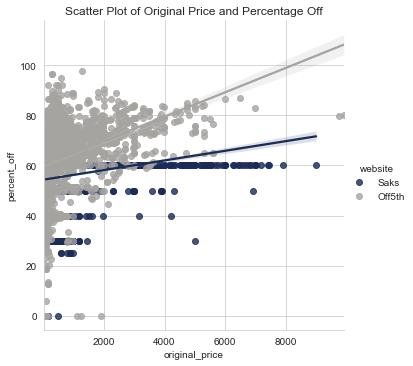

In [23]:
import matplotlib.pyplot as plt
sns.lmplot(data=combined,x='original_price',
                y='percent_off',hue='website',
                palette=['#192b57','#a6a4a1']) #,alpha=0.5
sns.set_style("whitegrid")
plt.title('Scatter Plot of Original Price and Percentage Off')
# plt.savefig("discount_by_site.png")
# plt.savefig("discount_by_site.pdf")

Text(0.5, 1.0, 'Scatter Plot of Original Price and Percentage Off')

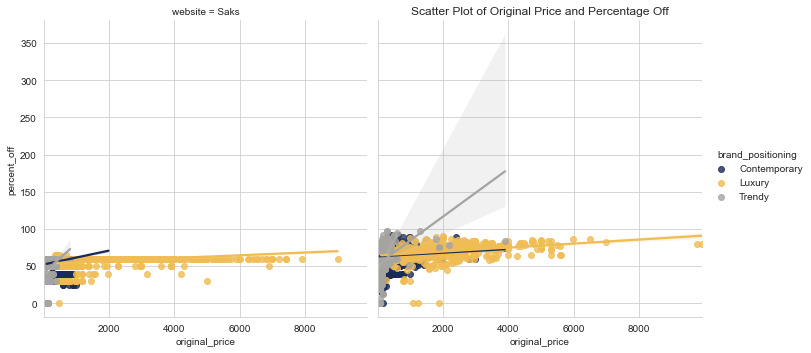

In [24]:
import matplotlib.pyplot as plt
sns.lmplot(data=combined,x='original_price',y='percent_off',
           hue='brand_positioning', col='website',
           palette=['#192b57','#f0bc54','#a6a4a1'])
sns.set_style("whitegrid")
plt.title('Scatter Plot of Original Price and Percentage Off')
# plt.savefig("discount_by_site.png")
# plt.savefig("discount_by_site.pdf")

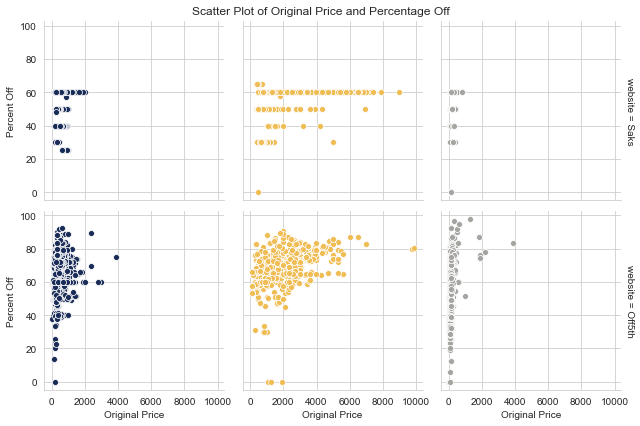

In [25]:
# sns.set_theme(style="whitegrid", palette="muted")

g = sns.FacetGrid(combined, col = 'brand_positioning', row = 'website',
                  hue = 'brand_positioning',
                  palette=['#192b57','#f0bc54','#a6a4a1'],
                  margin_titles=True) #,palette=['#192b57','#a6a4a1']
g.map(sns.scatterplot, 'original_price','percent_off')
g.fig.suptitle('Scatter Plot of Original Price and Percentage Off')
g.set(xlabel='Original Price',ylabel='Percent Off',title = '')

g.savefig("scatter_by_brand.png")
g.savefig("scatter_by_brand.pdf")

In [26]:
combined.sample(6)

website                  brand_name  \
887   Off5th                      No. 21   
4016  Off5th                     sundays   
2053    Saks  Teri Jon by Rickie Freeman   
393     Saks           Ermenegildo Zegna   
588   Off5th                BCBGMAXAZRIA   
1589    Saks         Kate Spade New York   

                                 product_name                   category  \
887                    Candy Apple Midi Dress                    dresses   
4016                        Nikon Ombre Dress                    dresses   
2053        Sequin Leopard Print Sheath Dress                    dresses   
393      Slim-Fit Textured Cotton Dress Shirt  casual-button-down-shirts   
588       Bird of Paradise Strappy Maxi Dress                    dresses   
1589  Metallic Pleated Knit Fit-&-Flare Dress                    dresses   

           department  original_price  discount_price  order  percent_off  \
887             women           895.0          357.99   1509        60.00   
4016            women           141.0           59.99    445        57.45   
2053  women-s-apparel           580.0          232.00   2293        60.00   
393               men           395.0          197.49    470        50.00   
588             women           198.0           79.99    928        59.60   
1589  women-s-apparel           398.0          159.20   1665        60.00   

     private_label  brand_mean brand_positioning  
887    Non-Private  913.076923      Contemporary  
4016   Non-Private  207.800000      Contemporary  
2053   Non-Private  652.586207      Contemporary  
393    Non-Private  424.472727            Luxury  
588    Non-Private  281.750000      Contemporary  
1589   Non-Private  407.230769      Contemporary

In [27]:
offbrand = off5th['brand_name'].unique().tolist()

In [28]:
saksbrand = saks['brand_name'].unique().tolist()

In [29]:
common_brands = list(set(offbrand).intersection(set(saksbrand)))

In [30]:
common = combined.loc[combined['brand_name'].isin(common_brands)]

In [31]:
exclusive = combined.loc[~combined['brand_name'].isin(common_brands)]

In [32]:
common.shape

(6557, 12)

In [33]:
exclusive.shape

(2543, 12)

In [34]:
combined.shape

(9100, 12)

In [35]:
exclusive.groupby(['website']).mean()[['original_price','discount_price','percent_off']]

original_price  discount_price  percent_off
website                                             
Off5th       252.985825       90.469060    60.056372
Saks         909.408703      385.565973    54.445410

In [36]:
common.groupby(['website']).mean()[['original_price','discount_price','percent_off']]

original_price  discount_price  percent_off
website                                             
Off5th       702.628263      222.125149    64.197587
Saks         799.702909      336.095630    56.128986

In [37]:
combined.groupby(['website']).agg(['count','mean'])[['original_price','discount_price','percent_off']]

original_price             discount_price             percent_off  \
                 count        mean          count        mean       count   
website                                                                     
Off5th            5111  530.460340           5111  171.714081        5111   
Saks              3989  815.819128           3989  343.363021        3989   

                    
              mean  
website             
Off5th   62.611917  
Saks     55.881662

In [38]:
combined.loc[combined['brand_name'].isin(common_brands),'exclusivity'] = 'Shared'
combined.loc[~combined['brand_name'].isin(common_brands),'exclusivity'] = 'Exclusive'

In [39]:
combined.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category department  original_price  discount_price  order  \
0  dress-shirts        men           250.0           175.0      1   
1  dress-shirts        men           295.0           206.5      2   
2  dress-shirts        men           250.0           175.0      5   
3  dress-shirts        men           295.0           206.5      6   
4  dress-shirts        men           225.0           157.5      7   

   percent_off private_label  brand_mean brand_positioning exclusivity  
0         30.0   Non-Private  260.457143      Contemporary      Shared  
1         30.0   Non-Private  260.457143      Contemporary      Shared  
2         30.0   Non-Private  260.457143      Contemporary      Shared  
3         30.0   Non-Private  260.457143      Contemporary      Shared  
4         30.0   Non-Private  260.457143      Contemporary      Shared

In [114]:
combined.groupby(['website','exclusivity']).mean()[['original_price','discount_price']].reset_index()

website exclusivity  original_price  discount_price
0  Off5th   Exclusive      252.985825       90.469060
1  Off5th      Shared      702.628263      222.125149
2    Saks   Exclusive      909.408703      385.565973
3    Saks      Shared      799.702909      336.095630

In [115]:
exclusive = combined.loc[combined['exclusivity']=='Exclusive']
nonexclu = combined.loc[combined['exclusivity']!='Exclusive']

In [117]:
exclusive_melt = pd.melt(exclusive,id_vars=['website','brand_name','product_name','category','brand_positioning','private_label'],
                        value_vars=['original_price','discount_price','percent_off'])
exclusive_melt.head()

website brand_name                  product_name                   category  \
0    Saks      Eidos           Striped Dress Shirt               dress-shirts   
1    Saks      Eidos        One Pocket Dress Shirt               dress-shirts   
2    Saks      Eidos           Striped Dress Shirt               dress-shirts   
3    Saks      Eidos        One Pocket Dress Shirt               dress-shirts   
4    Saks      Eidos  Garment Washed Western Shirt  casual-button-down-shirts   

  brand_positioning private_label        variable  value  
0      Contemporary   Non-Private  original_price  250.0  
1      Contemporary   Non-Private  original_price  250.0  
2      Contemporary   Non-Private  original_price  250.0  
3      Contemporary   Non-Private  original_price  250.0  
4      Contemporary   Non-Private  original_price  250.0

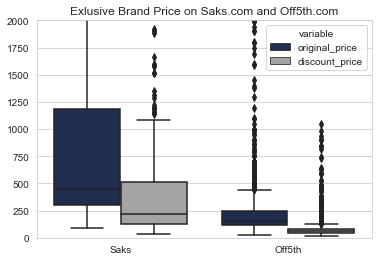

In [123]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=exclusive_melt.loc[exclusive_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 2000))
ax.set(ylabel='',xlabel='',title = 'Exlusive Brand Price on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("exclusive_price_compare.png")
fig.savefig("exclusive_price_compare.pdf")

In [119]:
nonexclu_melt = pd.melt(nonexclu,id_vars=['website','brand_name','product_name','category','brand_positioning','private_label'],
                        value_vars=['original_price','discount_price','percent_off'])
nonexclu_melt.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category brand_positioning private_label        variable  value  
0  dress-shirts      Contemporary   Non-Private  original_price  250.0  
1  dress-shirts      Contemporary   Non-Private  original_price  295.0  
2  dress-shirts      Contemporary   Non-Private  original_price  250.0  
3  dress-shirts      Contemporary   Non-Private  original_price  295.0  
4  dress-shirts      Contemporary   Non-Private  original_price  225.0

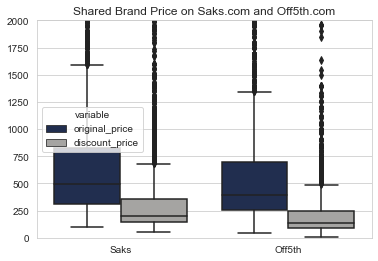

In [124]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.boxplot(x="website", y="value", hue="variable", 
                 data=nonexclu_melt.loc[nonexclu_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 2000))
# plt.legend([],[], frameon=False)
ax.set(ylabel='',xlabel='',title = 'Shared Brand Price on Saks.com and Off5th.com')
fig = ax.get_figure()
fig.savefig("shared_price_compare.png")
fig.savefig("shared_price_compare.pdf")

In [45]:
ex_counts = combined.loc[combined['exclusivity']=='Exclusive'].groupby(['website','brand_positioning'])['brand_name'].count().reset_index()
ex_counts['percent'] = [0.42,0.02,0.56,0.33,0.48,0.18]
ex_counts

website brand_positioning  brand_name  percent
0  Off5th      Contemporary         825     0.42
1  Off5th            Luxury          44     0.02
2  Off5th            Trendy        1088     0.56
3    Saks      Contemporary         195     0.33
4    Saks            Luxury         284     0.48
5    Saks            Trendy         107     0.18

In [46]:
total_counts = combined.groupby(['website','brand_positioning']).count()[['brand_name']].reset_index()
total_counts['percent'] = [0.56,0.14,0.30,0.65,0.28,0.08]
total_counts

website brand_positioning  brand_name  percent
0  Off5th      Contemporary        2849     0.56
1  Off5th            Luxury         716     0.14
2  Off5th            Trendy        1546     0.30
3    Saks      Contemporary        2585     0.65
4    Saks            Luxury        1104     0.28
5    Saks            Trendy         300     0.08

In [49]:
combined.loc[combined['brand_positioning']=='Luxury','brand_name'].unique()

array(['Isaia', 'Ralph Lauren Purple Label', 'Brioni', 'Kiton',
       'Ermenegildo Zegna', 'Charvet', 'Thom Browne', 'Versace',
       'Palm Angels', 'Loro Piana', 'Marcelo Burlon',
       'Versace Jeans Couture', 'Neil Barrett', 'Brandon Maxwell',
       'Silvia Tcherassi', 'Rick Owens', 'Escada', 'Lela Rose',
       'Proenza Schouler', 'Carolina Herrera', 'Comme des Garcons',
       'Jacquemus', 'Agua By Agua Bendita', 'Zimmermann', 'Paco Rabanne',
       'Akris punto', 'Akris', 'Marina Moscone', 'Alexandre Vauthier',
       'Herve Leger', 'Burberry', 'Alaïa', 'Stella McCartney', 'Marni',
       'Cushnie', 'Balmain', 'Talbot Runhof', 'Rosetta Getty', 'Loewe',
       'Dolce & Gabbana', 'Safiyaa', 'Marchesa', 'Khaite',
       'Prabal Gurung', 'Rosie Assoulin', 'Michael Kors Collection',
       'Johanna Ortiz', 'Haney', 'Jason Wu Collection',
       'Oscar de la Renta', 'Wandering', 'Runway Marc Jacobs',
       'Ralph Lauren Collection', 'Altuzarra', 'Moschino', 'Black Iris',
       'O

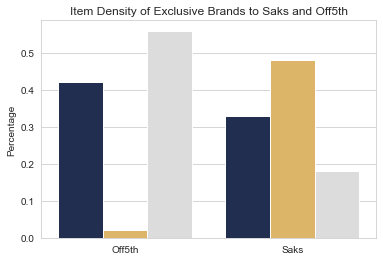

In [85]:
sns.barplot(x="website", y="percent", hue="brand_positioning", data=ex_counts,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Item Density of Exclusive Brands to Saks and Off5th')
plt.xlabel('')
plt.ylabel('Percentage')
plt.savefig("exclusive_counts.png")
plt.savefig("exclusive_counts.pdf")

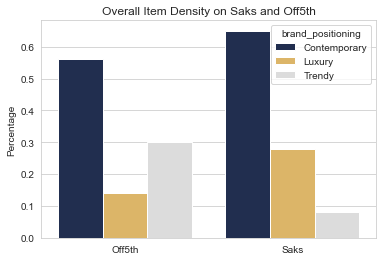

In [86]:
sns.barplot(x="website", y="percent", hue="brand_positioning", data=total_counts,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Overall Item Density on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Percentage')
plt.savefig("all_counts.png")
plt.savefig("all_counts.pdf")

# brand level

In [106]:
ex_price = (exclusive.groupby(['website','brand_name','brand_positioning'])[['original_price','discount_price','percent_off']]
            .mean().groupby(['website','brand_positioning'])
            .mean().reset_index())
print(ex_price)
sh_price = (common.groupby(['website','brand_name','brand_positioning'])[['original_price','discount_price','percent_off']]
            .mean().groupby(['website','brand_positioning'])
            .mean().reset_index())
print(sh_price)

  website brand_positioning  original_price  discount_price  percent_off
0  Off5th      Contemporary      397.210647      130.296086    66.448867
1  Off5th            Luxury     2031.167183      521.912724    73.436643
2  Off5th            Trendy      116.939557       49.343431    54.775888
3    Saks      Contemporary      415.057661      175.003994    57.009861
4    Saks            Luxury     1977.936712      800.015993    58.868584
5    Saks            Trendy      166.280029       75.024342    54.555390
  website brand_positioning  original_price  discount_price  percent_off
0  Off5th      Contemporary      493.120279      174.926857    63.685828
1  Off5th            Luxury     2021.983006      569.467865    69.103430
2  Off5th            Trendy      160.832910       66.344172    57.003719
3    Saks      Contemporary      473.601521      198.882835    57.418246
4    Saks            Luxury     2071.149427      845.520283    58.529399
5    Saks            Trendy      160.205838       8

Text(0, 0.5, 'Count')

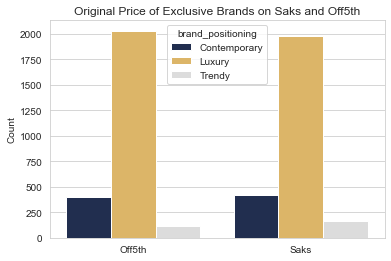

In [92]:
sns.barplot(x="website", y="original_price", hue="brand_positioning", data=ex_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Original Price of Exclusive Brands on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

Text(0, 0.5, 'Count')

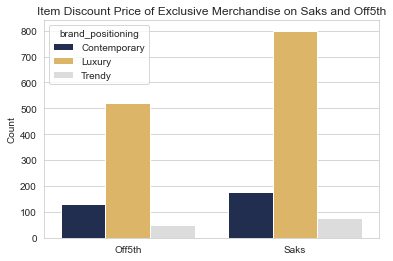

In [94]:
sns.barplot(x="website", y="discount_price", hue="brand_positioning", data=ex_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Item Discount Price of Exclusive Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

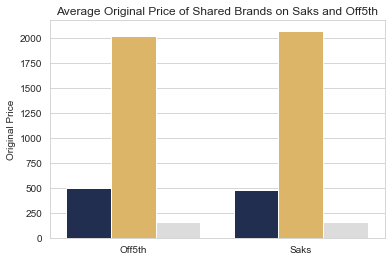

In [107]:
sns.barplot(x="website", y="original_price", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Average Original Price of Shared Brands on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Original Price')
plt.savefig("shared_oripri.png")
plt.savefig("shared_oripri.pdf")

In [105]:
common.groupby(['brand_name'])[['original_price','discount_price','percent_off']].mean()

original_price  discount_price  percent_off
brand_name                                                    
3.1 Phillip Lim        681.973684      261.179474    61.067105
7 For All Mankind      173.900000       74.239000    57.774000
A.L.C.                 543.977273      200.298182    62.569545
AMI Paris              282.500000      112.995000    60.000000
AMUR                   612.666667      227.708333    62.683000
...                           ...             ...          ...
Zac Posen             2130.000000      668.596000    65.763000
Zimmermann            1117.307692      551.345385    50.769231
alexanderwang.t        366.250000      126.492500    65.482500
byTiMo                 413.428571      165.367143    60.000000
n:Philanthropy         164.666667      107.998333    34.911667

[213 rows x 3 columns]

In [ ]:
from statsmodels.multivariate.manova import MANOVA

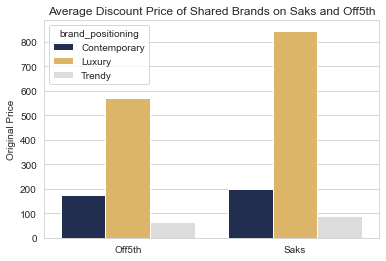

In [110]:
sns.barplot(x="website", y="discount_price", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Average Discount Price of Shared Brands on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Original Price')
plt.savefig("shared_dispri.png")
plt.savefig("shared_dispri.pdf")

Text(0, 0.5, 'Count')

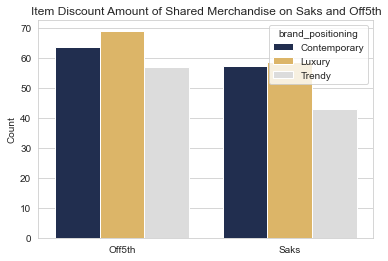

In [109]:
sns.barplot(x="website", y="percent_off", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Item Discount Amount of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

Text(0, 0.5, 'Count')

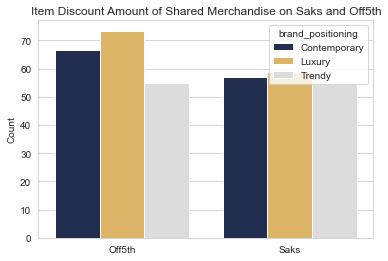

In [101]:
sns.barplot(x="website", y="percent_off", hue="brand_positioning", data=ex_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Item Discount Amount of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

In [ ]:
sns.barplot(x="website", y="percent_off", hue="brand_positioning", data=sh_price,
            palette=['#192b57','#f0bc54','#dcdcdc'])
sns.set_style("whitegrid")
plt.title('Item Discount Amount of Shared Merchandise on Saks and Off5th')
plt.xlabel('')
plt.ylabel('Count')
# plt.savefig("exclusive_counts.png")
# plt.savefig("exclusive_counts.pdf")

In [100]:
combined.copy()[['website','brand_name','brand_positioning','original_price','discount_price','percent_off']]

website      brand_name brand_positioning  original_price  \
0       Saks            Eton      Contemporary           250.0   
1       Saks            Eton      Contemporary           295.0   
2       Saks            Eton      Contemporary           250.0   
3       Saks            Eton      Contemporary           295.0   
4       Saks            Eton      Contemporary           225.0   
...      ...             ...               ...             ...   
5106  Off5th  Boss Hugo Boss            Trendy           118.0   
5107  Off5th  Boss Hugo Boss            Trendy           118.0   
5108  Off5th  Boss Hugo Boss            Trendy           158.0   
5109  Off5th  Boss Hugo Boss            Trendy           158.0   
5110  Off5th  Boss Hugo Boss            Trendy           158.0   

      discount_price  percent_off  
0             175.00        30.00  
1             206.50        30.00  
2             175.00        30.00  
3             206.50        30.00  
4             157.50        30.00  
...              ...          ...  
5106           49.97        57.65  
5107           59.99        49.16  
5108           69.99        55.70  
5109           59.99        62.03  
5110           59.99        62.03  

[9100 rows x 6 columns]

In [58]:
off = (combined.groupby(['website','exclusivity','brand_name'])
       .agg(['mean'])['percent_off'].reset_index()
       .sort_values('exclusivity',ascending=False)
       .groupby(['exclusivity','website']).mean().reset_index()
       .sort_values('exclusivity',ascending=False))
off

exclusivity website       mean
2      Shared  Off5th  65.121175
3      Shared    Saks  57.041343
0   Exclusive  Off5th  60.673154
1   Exclusive    Saks  57.536907

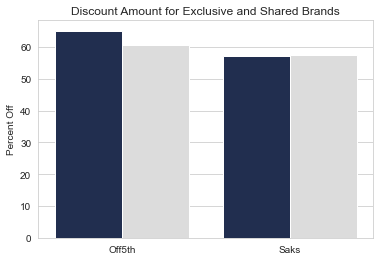

In [84]:
sns.barplot(x="website", y="mean", hue="exclusivity", data=off,
            palette=['#192b57','#dcdcdc'])
sns.set_style("whitegrid")
plt.legend([],[], frameon=False)
plt.title('Discount Amount for Exclusive and Shared Brands')
plt.xlabel('')
plt.ylabel('Percent Off')
plt.savefig("off_ex.png")
plt.savefig("off_ex.pdf")

In [60]:
brand_off = combined.groupby(['website','exclusivity','brand_name']).agg(['mean'])['percent_off'].reset_index()
exclu = brand_off.loc[brand_off['exclusivity']=='Exclusive','mean']
nonex = brand_off.loc[brand_off['exclusivity']!='Exclusive','mean']

In [62]:
from scipy import stats
print(stats.ttest_ind(exclu, nonex))

Ttest_indResult(statistic=-2.196354810524573, pvalue=0.028367512199998137)


In [63]:
print(stats.ttest_ind(exclu, nonex))

Ttest_indResult(statistic=-2.196354810524573, pvalue=0.028367512199998137)


In [64]:
saks_ex = brand_off.loc[(brand_off['exclusivity']=='Exclusive') & (brand_off['website']=='Saks'),'mean']
saks_non = brand_off.loc[(brand_off['exclusivity']!='Exclusive') & (brand_off['website']=='Saks'),'mean']
print(stats.ttest_ind(saks_ex, saks_non))

Ttest_indResult(statistic=0.7448556874266962, pvalue=0.4569022533245518)


In [65]:
off_ex = brand_off.loc[(brand_off['exclusivity']=='Exclusive') & (brand_off['website']!='Saks'),'mean']
off_non = brand_off.loc[(brand_off['exclusivity']!='Exclusive') & (brand_off['website']!='Saks'),'mean']
print(stats.ttest_ind(off_ex, off_non))

Ttest_indResult(statistic=-4.665352832378476, pvalue=4.101870082448996e-06)


In [66]:
combined.groupby(['brand_name','exclusivity']).count()['website'].reset_index().groupby('exclusivity').count()

brand_name  website
exclusivity                     
Exclusive           337      337
Shared              213      213

In [68]:
import plotly.graph_objects as go

labels = ['Shared Brands','Exclusive Brand']
values = [213, 337]
colors = ['rgb(25, 43, 87)','rgb(220, 220, 220)']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [69]:
sak_w_con = saks.loc[(saks['brand_positioning']=='Contemporary') & (saks['department']!='men'),'product_name']
sak_w_con

558          Talita Short-Sleeve Dress
559                 Zadie Jersey Dress
560           Gaelle Ruffle Mini Dress
561          Double Gauze Tiered Dress
562       Striped Tie-Waist Midi Dress
                     ...              
3954             Scarf Tie Shift Dress
3955    Asymmetrical Mixed Print Dress
3956    Asymmetrical Mixed Print Dress
3957        Printed Ruffle Flare Dress
3958               Micro-Pleated Dress
Name: product_name, Length: 2221, dtype: object

In [71]:
off_w_con = off5th.loc[(off5th['brand_positioning']=='Contemporary') & (off5th['department']!='men'),'product_name']
off_w_con

0           Metallic-Print Crewneck Mini Dress
1                  Coleen Geometric Shirtdress
2       Gradient Long-Sleeve Sequin Mini Dress
4         Bonnie Iridescent Sequin Shift Dress
7                 Giovanetta Embellished Dress
                         ...                  
4665                    Joya Halter Mini Dress
4666                          Zia Ribbed Dress
4673    Arwen Embellished Plaid Cocktail Dress
4674              Halterneck Floral Tent Dress
5044                   Sleeveless Sheath Dress
Name: product_name, Length: 2243, dtype: object

In [72]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
#create the countvectorizer obj
cnt_vec = CountVectorizer()
cnt_vec_data = cnt_vec.fit_transform(sak_w_con)
#to create the features for text as a separate dataframe
df = pd.DataFrame(cnt_vec_data.todense(), columns=cnt_vec.get_feature_names())

In [73]:
df

20  21  24  25  3d  70s  abba  abeline  abella  abigail  ...  zibeline  \
0      0   0   0   0   0    0     0        0       0        0  ...         0   
1      0   0   0   0   0    0     0        0       0        0  ...         0   
2      0   0   0   0   0    0     0        0       0        0  ...         0   
3      0   0   0   0   0    0     0        0       0        0  ...         0   
4      0   0   0   0   0    0     0        0       0        0  ...         0   
...   ..  ..  ..  ..  ..  ...   ...      ...     ...      ...  ...       ...   
2216   0   0   0   0   0    0     0        0       0        0  ...         0   
2217   0   0   0   0   0    0     0        0       0        0  ...         0   
2218   0   0   0   0   0    0     0        0       0        0  ...         0   
2219   0   0   0   0   0    0     0        0       0        0  ...         0   
2220   0   0   0   0   0    0     0        0       0        0  ...         0   

      zig  zigzag  zip  zoe  zoey  zolina  zosia  zoya  zuzanna  
0       0       0    0    0     0       0      0     0        0  
1       0       0    0    0     0       0      0     0        0  
2       0       0    0    0     0       0      0     0        0  
3       0       0    0    0     0       0      0     0        0  
4       0       0    0    0     0       0      0     0        0  
...   ...     ...  ...  ...   ...     ...    ...   ...      ...  
2216    0       0    0    0     0       0      0     0        0  
2217    0       0    0    0     0       0      0     0        0  
2218    0       0    0    0     0       0      0     0        0  
2219    0       0    0    0     0       0      0     0        0  
2220    0       0    0    0     0       0      0     0        0  

[2221 rows x 1777 columns]

In [74]:
kw1 = np.sum(df,axis=0).sort_values(ascending=False).head(50)

In [75]:
cnt_vec = CountVectorizer()
cnt_vec_data = cnt_vec.fit_transform(off_w_con)
#to create the features for text as a separate dataframe
df2 = pd.DataFrame(cnt_vec_data.todense(), columns=cnt_vec.get_feature_names())
kw2 = np.sum(df2,axis=0).sort_values(ascending=False).head(50)

In [76]:
kw1 = kw1.reset_index()

In [77]:
kw2 = kw2.reset_index()

In [78]:
kwpair = pd.merge(kw1,kw2,how='outer',on='index')
kwpair

index     0_x     0_y
0         dress  1885.0  1810.0
1        floral   311.0   355.0
2        sleeve   284.0   206.0
3          mini   282.0   288.0
4          midi   272.0   172.0
5          gown   188.0   343.0
6         print   188.0   212.0
7          silk   172.0   188.0
8        sheath   162.0   191.0
9          wrap   137.0   137.0
10   shirtdress   135.0    83.0
11       sequin   133.0    90.0
12     shoulder   129.0   144.0
13         puff   128.0     NaN
14       ruffle   123.0   137.0
15         line    99.0   106.0
16        shift    89.0    81.0
17     metallic    88.0    62.0
18          tie    80.0    64.0
19   sleeveless    79.0   113.0
20         maxi    78.0    87.0
21         lace    74.0   124.0
22          the    72.0    67.0
23         neck    72.0    78.0
24      pleated    67.0    46.0
25       belted    67.0     NaN
26      leopard    65.0     NaN
27        flare    65.0    94.0
28          off    61.0    64.0
29      stretch    59.0    43.0
30       ruched    58.0    45.0
31     jacquard    58.0     NaN
32        satin    57.0    40.0
33         long    56.0    53.0
34          one    54.0    51.0
35         knit    54.0    57.0
36      printed    54.0    68.0
37       stripe    47.0    41.0
38      striped    47.0    69.0
39    strapless    46.0    41.0
40      flounce    45.0     NaN
41         slip    45.0     NaN
42        crepe    44.0    38.0
43       tiered    43.0    44.0
44       velvet    42.0     NaN
45   asymmetric    40.0    44.0
46        waist    39.0     NaN
47      bodycon    38.0     NaN
48          fit    36.0    57.0
49        shirt    36.0     NaN
50  embellished     NaN    92.0
51       cotton     NaN    68.0
52      ruffled     NaN    58.0
53         high     NaN    55.0
54          low     NaN    50.0
55        blend     NaN    47.0
56        front     NaN    44.0
57      blouson     NaN    43.0
58       halter     NaN    38.0
59       beaded     NaN    34.0

In [79]:
kwpair[(kwpair['0_y'].isna())|(kwpair['0_x'].isna())]

index    0_x   0_y
13         puff  128.0   NaN
25       belted   67.0   NaN
26      leopard   65.0   NaN
31     jacquard   58.0   NaN
40      flounce   45.0   NaN
41         slip   45.0   NaN
44       velvet   42.0   NaN
46        waist   39.0   NaN
47      bodycon   38.0   NaN
49        shirt   36.0   NaN
50  embellished    NaN  92.0
51       cotton    NaN  68.0
52      ruffled    NaN  58.0
53         high    NaN  55.0
54          low    NaN  50.0
55        blend    NaN  47.0
56        front    NaN  44.0
57      blouson    NaN  43.0
58       halter    NaN  38.0
59       beaded    NaN  34.0

In [80]:
kwpair[kwpair['0_y'].isna()].rename(columns={'index':'keywords','0_x':'Saks','0_y':'Off5th'})

keywords   Saks  Off5th
13      puff  128.0     NaN
25    belted   67.0     NaN
26   leopard   65.0     NaN
31  jacquard   58.0     NaN
40   flounce   45.0     NaN
41      slip   45.0     NaN
44    velvet   42.0     NaN
46     waist   39.0     NaN
47   bodycon   38.0     NaN
49     shirt   36.0     NaN

In [81]:
combined.loc[combined['private_label']=='Private Label'].groupby('website').mean()[['original_price','discount_price','percent_off']]

original_price  discount_price  percent_off
website                                             
Off5th       153.255994       49.636222    57.571676
Saks         192.202247       96.101011    50.000000

In [82]:
combined[combined['brand_positioning']=='Trendy'].groupby('website').mean()[['original_price','discount_price','percent_off']]

original_price  discount_price  percent_off
website                                             
Off5th       144.172186       55.011727    56.706035
Saks         188.841667       96.452500    47.733800

In [83]:
combined['private_label'].value_counts()

Non-Private      8659
Private Label     441
Name: private_label, dtype: int64

In [125]:
nonexclu.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category department  original_price  discount_price  order  \
0  dress-shirts        men           250.0           175.0      1   
1  dress-shirts        men           295.0           206.5      2   
2  dress-shirts        men           250.0           175.0      5   
3  dress-shirts        men           295.0           206.5      6   
4  dress-shirts        men           225.0           157.5      7   

   percent_off private_label  brand_mean brand_positioning exclusivity  
0         30.0   Non-Private  260.457143      Contemporary      Shared  
1         30.0   Non-Private  260.457143      Contemporary      Shared  
2         30.0   Non-Private  260.457143      Contemporary      Shared  
3         30.0   Non-Private  260.457143      Contemporary      Shared  
4         30.0   Non-Private  260.457143      Contemporary      Shared

In [126]:
saks_non = nonexclu[nonexclu['website']=='Saks']
off_non = nonexclu[nonexclu['website']!='Saks']

In [131]:
sbn = saks_non.groupby('brand_name').mean()[['original_price','discount_price']].reset_index()
obn = off_non.groupby('brand_name').mean()[['original_price','discount_price']].reset_index()

In [133]:
delta = pd.merge(sbn,obn,on='brand_name')
delta.head()

brand_name  original_price_x  discount_price_x  original_price_y  \
0    3.1 Phillip Lim        657.692308        266.729231        734.583333   
1  7 For All Mankind        265.000000        132.500000        163.777778   
2             A.L.C.        573.333333        229.331333        528.793103   
3          AMI Paris        275.000000        110.000000        290.000000   
4               AMUR        615.058824        246.022353        609.538462   

   discount_price_y  
0        249.155000  
1         67.765556  
2        185.281034  
3        115.990000  
4        203.759231

In [138]:
delta['original_delta'] = delta['original_price_x']-delta['original_price_y']
delta['discount_delta'] = delta['discount_price_x']-delta['discount_price_y']
delta_ = delta[['brand_name','original_delta','discount_delta']]
delta_

brand_name  original_delta  discount_delta
0      3.1 Phillip Lim      -76.891026       17.574231
1    7 For All Mankind      101.222222       64.734444
2               A.L.C.       44.540230       44.050299
3            AMI Paris      -15.000000       -5.990000
4                 AMUR        5.520362       42.263122
..                 ...             ...             ...
208          Zac Posen     -725.000000      168.510000
209         Zimmermann      181.250000      185.635000
210    alexanderwang.t      131.666667       79.343333
211             byTiMo     -141.833333      -56.726667
212     n:Philanthropy       20.000000       57.610000

[213 rows x 3 columns]

In [147]:
import plotly.express as px

fig = px.histogram(delta_, x="original_delta", nbins=30)
fig.show()

In [149]:
import plotly.figure_factory as ff
import numpy as np

fig = ff.create_distplot([delta_['original_delta']], ['group_labels'])
fig.show()

In [150]:
import plotly.figure_factory as ff
import numpy as np

fig = ff.create_distplot([delta_['discount_delta']], ['group_labels'])
fig.show()